# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl.metadata (807 bytes)
  Using cached python_version-0.0.2-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\Sarwar\AppData\Local\Temp\pip-install-5tdhb7z9\tensorflow-gpu_03dab411a62e4f8fae687bbd4b9a23e4\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not bui

In [2]:
!pip list

Package                       Version              Editable project location
----------------------------- -------------------- ---------------------------------------------------------------------------------------------------
absl-py                       1.4.0
adagio                        0.2.4
aiohttp                       3.8.5
aiosignal                     1.3.1
alabaster                     0.7.12
alembic                       1.13.1
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
ansi2html                     1.8.0
antlr4-python3-runtime        4.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.4.1
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrit

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [6]:
import cv2
import imghdr

In [7]:
data_dir = 'data' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

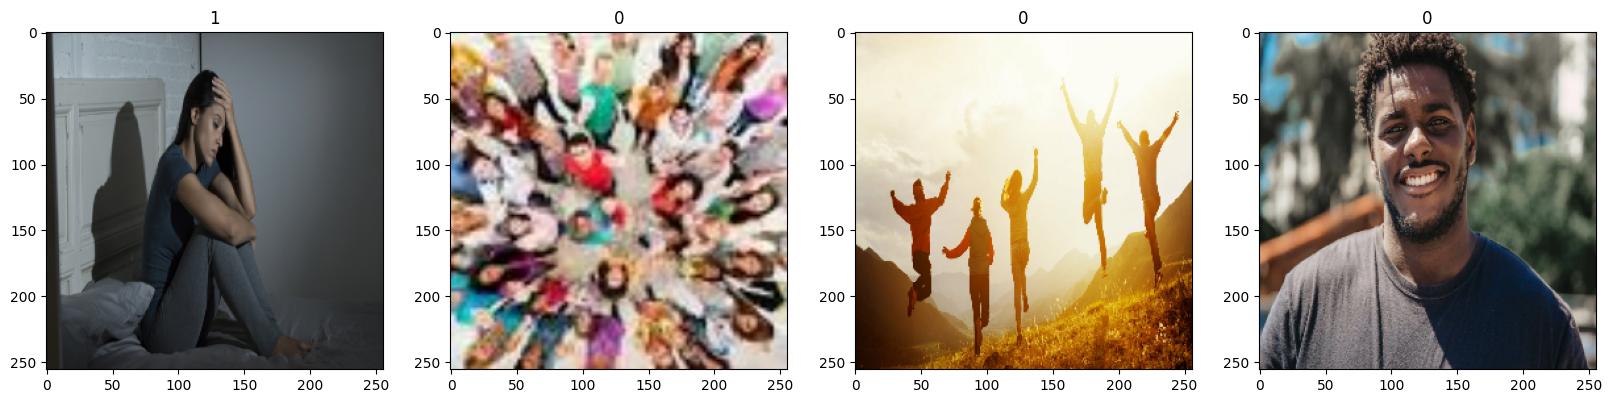

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [16]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [17]:
data.as_numpy_iterator().next()

(array([[[[0.94516695, 0.94516695, 0.94516695],
          [0.9490196 , 0.9490196 , 0.9490196 ],
          [0.9493643 , 0.9493643 , 0.9493643 ],
          ...,
          [0.11950061, 0.12342218, 0.09204964],
          [0.14385723, 0.1477788 , 0.11640625],
          [0.13354014, 0.1374617 , 0.10608915]],
 
         [[0.94516695, 0.94516695, 0.94516695],
          [0.9490196 , 0.9490196 , 0.9490196 ],
          [0.9493643 , 0.9493643 , 0.9493643 ],
          ...,
          [0.119712  , 0.12363356, 0.09226101],
          [0.14385723, 0.1477788 , 0.11640625],
          [0.13826564, 0.14218721, 0.11081465]],
 
         [[0.9465364 , 0.9465364 , 0.9465364 ],
          [0.9490931 , 0.9490931 , 0.9490931 ],
          [0.9507583 , 0.9507583 , 0.9507583 ],
          ...,
          [0.11984528, 0.12376685, 0.09518229],
          [0.14385723, 0.1477788 , 0.11919424],
          [0.14398439, 0.14790596, 0.1193214 ]],
 
         ...,
 
         [[0.45265013, 0.45265013, 0.45265013],
          [0.98493

# 5. Split Data

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
train_size

7

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [21]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [27]:
logdir='logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 32s 4s/step - loss: 0.8065 - accuracy: 0.5134 - val_loss: 0.6590 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 12s 1s/step - loss: 0.6510 - accuracy: 0.6964 - val_loss: 0.6327 - val_accuracy: 0.8281
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 0.5825 - accuracy: 0.7545 - val_loss: 0.5467 - val_accuracy: 0.7188
Epoch 4/20
7/7 [==============================] - 24s 3s/step - loss: 0.4853 - accuracy: 0.7634 - val_loss: 0.3825 - val_accuracy: 0.8281
Epoch 5/20
7/7 [==============================] - 12s 1s/step - loss: 0.4383 - accuracy: 0.8125 - val_loss: 0.3193 - val_accuracy: 0.9219
Epoch 6/20
7/7 [==============================] - 21s 3s/step - loss: 0.2860 - accuracy: 0.9107 - val_loss: 0.2711 - val_accuracy: 0.8906
Epoch 7/20
7/7 [==============================] - 11s 1s/step - loss: 0.2870 - accuracy: 0.8795 - val_loss: 0.1694 - val_accuracy: 0.9531
Epoch 8/20
7/7 [===================

# 8. Plot Performance

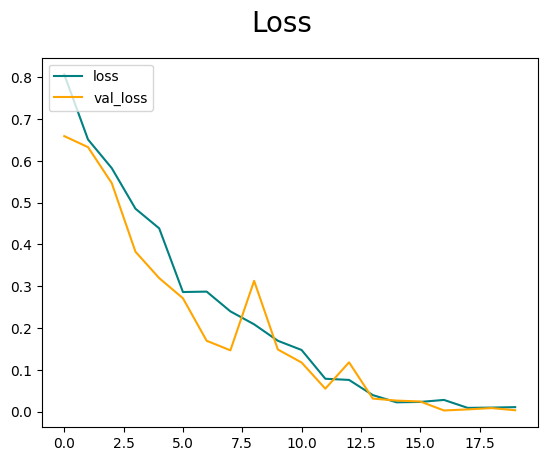

In [30]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

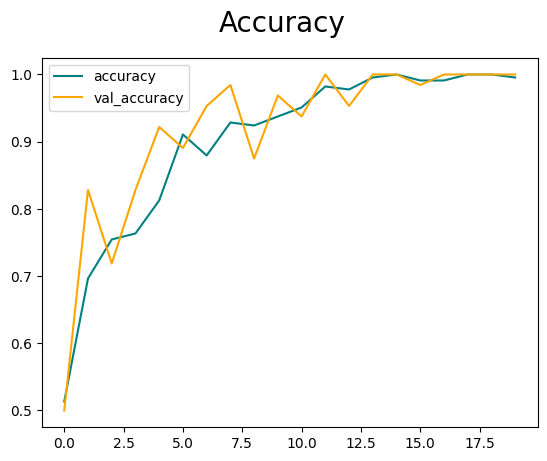

In [31]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [32]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [33]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [34]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 197ms/step


In [35]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.875, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9411765, shape=(), dtype=float32)


# 10. Test

In [36]:
import cv2

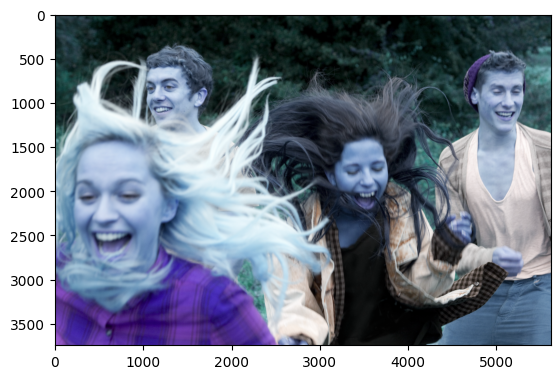

In [37]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

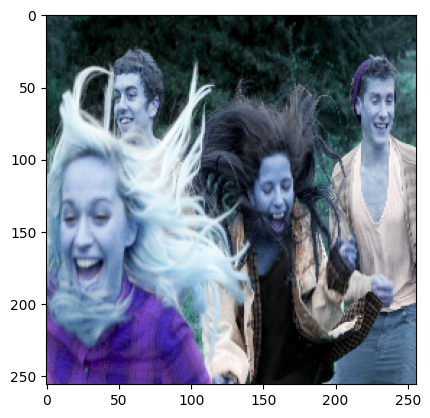

In [38]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [39]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 31ms/step


In [40]:
yhat

array([[0.21564619]], dtype=float32)

In [41]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [42]:
from tensorflow.keras.models import load_model

In [43]:
model.save(os.path.join('models','imageclassifier.h5'))

In [45]:
new_model = load_model('models/imageclassifier.h5')

In [46]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 83ms/step


array([[0.21564619]], dtype=float32)